## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single datas
#https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html
df = pd.DataFrame
Micestudy= pd.merge(mouse_metadata, study_results, on="Mouse ID")
Micestudy

# Display the data table for preview
print(Micestudy)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [64]:
# Checking the number of mice.
Micestudy["Mouse ID"].value_counts().head(10)
#have 1893 rows, dtype: int64


g989    13
f545    10
e213    10
u364    10
n304    10
z969    10
o926    10
k894    10
m601    10
d251    10
Name: Mouse ID, dtype: int64

In [18]:
# Optional: Get all the data for the duplicate mouse ID.
#https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based
#-on-all-or-selected-columns-using-dataframe-duplicated-in-python/

duplicateRowsDF = Micestudy[Micestudy.duplicated(['Mouse ID', 'Timepoint'])]
print("Duplicate Rows based on 2 columns are:", duplicateRowsDF, sep='\n')

Duplicate Rows based on 2 columns are:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [65]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#https://www.youtube.com/watch?v=ix9iGffOA5U
CleanMiceStudy_df =Micestudy.drop_duplicates(subset =["Mouse ID","Timepoint"])
CleanMiceStudy_df




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [66]:
# Checking the number of mice in the clean DataFrame.
CleanMiceStudy_df["Mouse ID"].value_counts().head(10)
#Also note we went from 1893 rows to 1888
#dtype: int64

f545    10
l509    10
u364    10
n304    10
z969    10
o926    10
k894    10
m601    10
d251    10
j119    10
Name: Mouse ID, dtype: int64

## Summary Statistics

In [72]:
#change annoying column name

CleanMiceStudy_df.rename(columns ={"Tumor Volume (mm3)":"Tumor_Volume"}, inplace=True)
CleanMiceStudy_df

print(CleanMiceStudy_df)





# This method is the most straighforward, creating multiple series and putting them all together at the end.



     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor_Volume  Metastatic Sites  
0        45.000000                 0  
1        38.825898                 0  
2        35.014271            

C:\Users\quali\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [82]:
# Generate a summary statistics table of tumor volume for each drug regimen - mean
average_tumorvolume = CleanMiceStudy_df['Tumor_Volume'].mean()
print(average_tumorvolume)

50.449276454131365


In [83]:
# Generate a summary statistics table of median , variance, standard deviation, and SEM of the tumor volume for each regimen
median_tumorvolume = CleanMiceStudy_df["Tumor_Volume"].median()
print(median_tumorvolume)

# This method produces everything in a single groupby function


48.951421075


In [88]:
#Generate a summary statistics table of variance of the tumor volume for each regimen
CleanMiceStudy_df.loc[:,"Tumor_Volume"].var()


79.29127745388136

In [90]:
#Generate a summary statistics table of standard deviation of the tumor volume for each regimen
#https://www.datasciencemadesimple.com/standard-deviation-function-python-pandas-row-column/
CleanMiceStudy_df.loc[:,"Tumor_Volume"].std()

8.904564978362579

In [91]:
#Generate a summary statistics table of SEM of the tumor volume for each regimen
CleanMiceStudy_df.loc[:"Tumor_Volume"].sem()

Age_months          0.165398
Weight (g)          0.090372
Timepoint           0.324152
Tumor_Volume        0.204933
Metastatic Sites    0.026202
dtype: float64

## Bar and Pie Charts

In [98]:
#Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot`
#that shows  the number of total mice for each treatment regimen throughout the course of the study.

#create DF for regimen and count
regimen_group = CleanMiceStudy_df.groupby("Drug Regimen")
regimen_group_count = pd.DataFrame(regimen_group["Drug Regimen"].count())
                                   
print(regimen_group_count)                


              Drug Regimen
Drug Regimen              
Capomulin              230
Ceftamin               178
Infubinol              178
Ketapril               188
Naftisol               186
Placebo                181
Propriva               156
Ramicane               228
Stelasyn               181
Zoniferol              182


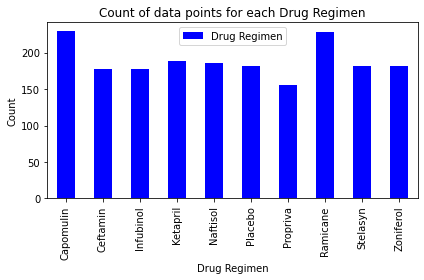

In [103]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
DrugRegimen_chart = regimen_group_count.plot(kind='bar', title="Count of data points for each Drug Regimen", color="blue")

# Set the xlabel and ylabel using class methods
DrugRegimen_chart.set_xlabel("Drug Regimen")
DrugRegimen_chart.set_ylabel("Count")

plt.tight_layout()


plt.savefig("DrugRegimen Chart.png")
plt.show()









In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pandas:
# Create a DF for Sex and count
gender_group = CleanMiceStudy_df.groupby('Sex')
gender_group_count = pd.DataFrame(gender_group['Sex'].count())

# View the groupby dataframe
gender_group_count.head()


#Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows 
#the distribution of female or male mice in the study.



,Sex
Sex,
Female,930
Male,958


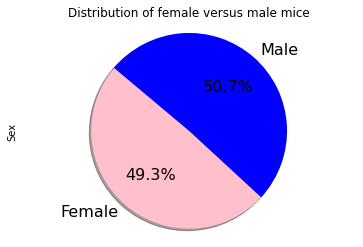

In [106]:
#Generate a pie plot using both Pandas's `DataFrame.plot() that shows 
#the distribution of female or male mice in the study.

gender_group_count.plot(kind='pie', y='Sex', \
                        title="Distribution of female versus male mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["pink","blue"],legend =False)

plt.axis("equal")
plt.savefig("Gender Chart.png")
plt.show()


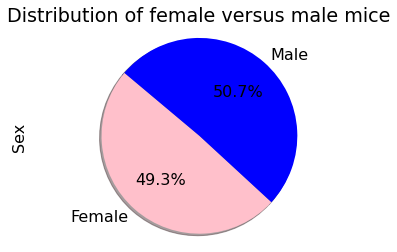

In [108]:
#and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.
#https://towardsdatascience.com/creating-a-basic-pie-chart-using-matplotlib-16dd3bf540b6
# Labels from index values from groupby df
genders = list(gender_group_count.index.values)

# The values of each section of the pie chart
gender_counts = gender_group_count['Sex']
colors = ["pink", "blue"]

plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.savefig("Pyplot Gender Distribution.png")
plt.show()

In [113]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens:
#Capomulin, Ramicane, Infubinol, and Ceftamin. 

# Start by getting the last (greatest) timepoint for each mouse
CleanMiceStudy_df["Timepoint"].max()




45

In [115]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html
Drugs_List = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
Drugs = CleanMiceStudy_df[CleanMiceStudy_df["Drug Regimen"].isin(Drugs_List)]
Drugs.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [122]:
# Groupby 'Mouse ID' for most promising treatements
thetumor_df= Drugs.groupby(['Drug Regimen','Mouse ID']).agg(\

# Get the last value of the 'Tumor Volume using a lambda function selecting the element in -1 position
#https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7
Last_tumor_size=('Tumor_Volume',lambda x: x.iloc[-1])).round(3)

# View the groupby dataframe
thetumor_df.head(10)

Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
             i557               47.686
             i738               37.312
             j119               38.125
             j246               38.753
             l509               41.483

In [127]:
#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all 
#four treatment regimens and highlight any potential outliers in the plot by changing their color and style.
#https://www.geeksforgeeks.org/reshape-a-pandas-dataframe-using-stackunstack-and-melt-method/
thetumor_df_unstacked = thetumor_df.stacked(level=0).unstack(level=0)
thetumor_df_unstacked.head(10)


#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.htmlast_

NameError: name 'thetumor_df' is not defined

## Quartiles, Outliers and Boxplots

In [129]:

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
#Calculate the IQR and quantitatively determine if there are any potential outliers.

# Put treatments into a list for for loop (and later for plot labels)
# Set counter to 0 which is used to only print dividing line at top of output
counter = 0

# Do quartile calculations for each drug
for Drug in Drugs_list:
    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

NameError: name 'Drugs_list' is not defined

In [ ]:
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fedcb074400>, <matplotlib.lines.Line2D object at 0x7fedcb074fa0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fedcc2155e0>, <matplotlib.lines.Line2D object at 0x7fedcc215a60>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fedcb074340>], 'medians': [<matplotlib.lines.Line2D object at 0x7fedcc215910>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fedcc2153d0>], 'means': []}

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
    

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
